In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Ground Cricket Chirps

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

Instantiate a LinearRegression object:

In [3]:
regr = linear_model.LinearRegression()

Define variables. x = feature, y = response

In [4]:
x = df['Ground Temperature']
x = x.to_frame()

In [5]:
y = df['Chirps/Second']

Fit linear model to data.

In [6]:
regr.fit(x, y)

/Users/kathrynjackson/Code/homework/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Simple Linear Regression Equation
y = β<sub>0</sub> + β<sub>1</sub> x<br>
<br>
y = response = df['Chirps/Second']<br>
x = feature = dr['Ground Temperature']<br>
β<sub>0</sub> = intercept = 0.459314645236<br>
β<sub>1</sub> = coefficient = 0.20299973

### Two ways to plot linear regression

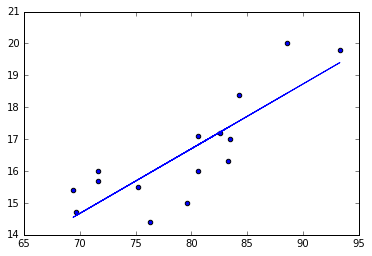

In [7]:
plt.scatter(x, y)
plt.plot(x, (regr.intercept_ + (regr.coef_ * x)))
plt.show()

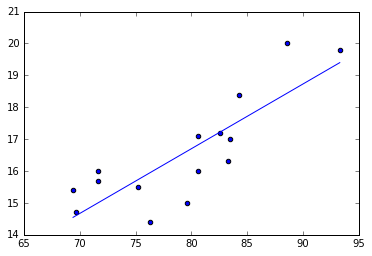

In [8]:
df_new = pd.DataFrame({'Ground Temp': [df['Ground Temperature'].min(), df['Ground Temperature'].max()]})

plt.scatter(x, y)
plt.plot(df_new, regr.predict(df_new))
plt.show()

### R<sup>2</sup> Score

In [9]:
regr.score(x, y)

0.69229465291469983

The R<sup>2</sup> score (or  coefficient of determination) for this linear regression is 0.69. This is not a great score.

### Extrapolate

In [10]:
regr.predict(95)

array([ 19.74428913])

According to this linear regression model, a ground temperature of 95°F would result in an expected rate of 19.74 chirps per second.

### Interpolate
I used the intercept and coefficient to manually calculate an interpolation.

In [11]:
(18 - regr.intercept_) / regr.coef_

array([ 86.40743135])

According to this linear regression model, a chirping rate of 18 would imply an approximate ground temperature of 86.4°F.

# Brain vs. Body Weight

In [18]:
bb = pd.read_table('brain_body.txt', delimiter=' ', skipinitialspace=True)
bb.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [20]:
bb_regr = linear_model.LinearRegression()

In [22]:
x = bb['Brain'].to_frame()
y = bb['Body']

In [ ]:
bb_regr.fit()